In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
%matplotlib inline

In [205]:
df=pd.read_csv(r'C:\Users\PAUNESH V\Documents\Data-analysis-and-Data-Analytics-master\10-Data-Capstone-Projects\911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# Basic Questions

1) List out the top 5 zipcodes for 911 calls?

In [207]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

2) And list out top 5 townships

In [208]:
df.twp.value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

3).Look at the 'Title' column, How many Unique title are there?

In [209]:
df['title'].nunique()

110

# Creating New Features

4).Split the title column specified before the title code. Lie EMS,Fire And Traffic.
use apply custom lambda expression to create a new column called "Reason" that must 
contains for the sting value

In [210]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [211]:
df['Reason']=df['title'].apply(lambda title :title.split(':')[0])

In [212]:
df.Reason.head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

5).Most Commen Reason Calls for 911?

In [213]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

6).Use the Seaborn to Create a Countplot of 911 calls by Reason.

<AxesSubplot:xlabel='Reason', ylabel='count'>

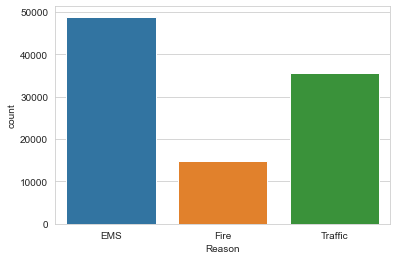

In [214]:
sns.countplot(x='Reason',data=df)

7).Time Information. what is the datatype of the objects in the timestramp column?

In [215]:
type(df['timeStamp'][0])

str

8).Here the all date&time data's are in string type. So you have to convert in string to datetime objects.

In [216]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

9).Now the timestamp are accually in Datetime Object. Use apply() to create new columns called 
Hour, Month, And Day of week.

In [217]:
dummy=(df['timeStamp'][0])

In [241]:
df['Date']=df['timeStamp'].apply(lambda x : x.date)

In [237]:
df['Hour']=df['timeStamp'].apply(lambda x : x.hour)

In [220]:
df['Month']=df['timeStamp'].apply(lambda x : x.month)

In [221]:
df['Dayofweek']=df['timeStamp'].apply(lambda x : x.dayofweek)

In [222]:
dmap={0:'mon',1:'Tue',2:'Wed',3:'Tue',4:'Fri',5:'Sat',6:'Sun'}

In [223]:
df['Dayofweek'].map(dmap)

0        Tue
1        Tue
2        Tue
3        Tue
4        Tue
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Dayofweek, Length: 99492, dtype: object

10). Create a countplot for Datofweek.

<AxesSubplot:xlabel='Dayofweek', ylabel='count'>

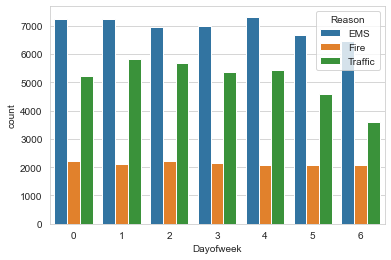

In [224]:
sns.countplot(x='Dayofweek',hue='Reason',data=df)

11). Create a countplot for Month.

<AxesSubplot:xlabel='Month', ylabel='count'>

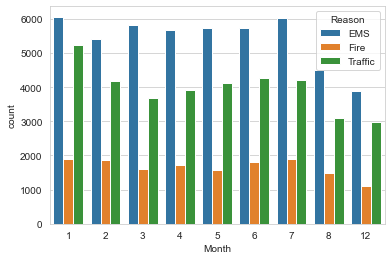

In [225]:
sns.countplot(x='Month',hue='Reason',data=df)

12).The month Coluumn hasn't some values have use pandas to replace the 
missing values.

In [226]:
bymonth=df.groupby('Month').count()

In [227]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,Hour,Dayofweek
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

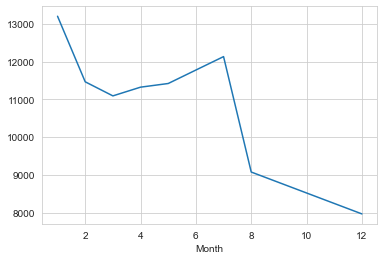

In [228]:
bymonth['twp'].plot()

13).Create a Linear fit on the number of calls per month.

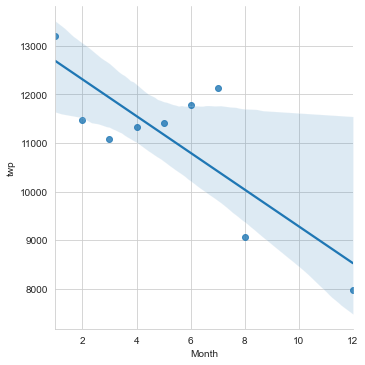

In [229]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())